# Challenge Telecom X

## Extração de Dados

In [1]:
# Importando o arquivo .json

import pandas as pd
import requests
import json

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

In [2]:
# Transformando em um Data Frame do Pandas normalizado

df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Explorando os dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Dicionário de Colunas

* customerID: número de identificação único de cada cliente
* Churn: se o cliente deixou ou não a empresa
* gender: gênero (masculino e feminino)
* SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* Partner: se o cliente possui ou não um parceiro ou parceira
* Dependents: se o cliente possui ou não dependentes
* tenure: meses de contrato do cliente
* PhoneService: assinatura de serviço telefônico
* MultipleLines: assisnatura de mais de uma linha de telefone
* InternetService: assinatura de um provedor internet
* OnlineSecurity: assinatura adicional de segurança online
* OnlineBackup: assinatura adicional de backup online
* DeviceProtection: assinatura adicional de proteção no dispositivo
* TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
* StreamingTV: assinatura de TV a cabo
* StreamingMovies: assinatura de streaming de filmes
* Contract: tipo de contrato
* PaperlessBilling: se o cliente prefere receber online a fatura
* PaymentMethod: forma de pagamento
* Charges.Monthly: total de todos os serviços do cliente por mês
* Charges.Total: total gasto pelo cliente

## Transformação dos Dados

In [4]:
# Conhecendo os dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [6]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [7]:
# Identificando colunas mais relevantes para análise da evasão

df[['customer.tenure', 'account.Contract','account.PaymentMethod','account.Charges.Monthly','account.Charges.Total']]

,customer.tenure,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,9,One year,Mailed check,65.60,593.3
1,9,Month-to-month,Mailed check,59.90,542.4
2,4,Month-to-month,Electronic check,73.90,280.85
3,13,Month-to-month,Electronic check,98.00,1237.85
4,3,Month-to-month,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,13,One year,Mailed check,55.15,742.9
7263,22,Month-to-month,Electronic check,85.10,1873.7
7264,2,Month-to-month,Mailed check,50.30,92.75
7265,67,Two year,Mailed check,67.85,4627.65


### Verificando inconsistências nos dados

In [8]:
# Exitem dados do tipo NAN?

df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
# Existem dados de ID de cliente duplicados?

print((df['customerID'].duplicated().sum()))

0


In [10]:
# Existem dados do tipo ' '?

df.isin([' ']).sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [11]:
# Existem dados do tipo ''?

df.isin(['']).sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [12]:
# Quais os tipos de valores em cada coluna?

df.nunique()

,0
customerID,7267
Churn,3
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,73
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3


In [13]:
# entendendo a categoria Churn

df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


### Tratando as inconsistências

In [14]:
# ajustando os nomes das colunas

df.columns.str.lower().str.replace('.', '_')

# substituindo no data frame original

df.columns = df.columns.str.lower().str.replace('.', '_')

# verificando se deu certo

df.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

In [15]:
# ajustando os dados vazios

# Coluna churn
# transformando em booleano para calcular a média e definir com NaN os valores vazios

df['churn'] = df['churn'].map({'Yes': True, 'No': False})

# verificando se deu certo

df['churn'].value_counts()

,count
churn,
False,5174
True,1869


In [16]:
# calculando o percentual de churn

df['churn'].mean()

np.float64(0.2653698707936959)

In [17]:
# verificando se os valores vazios foram convertidos para NaN

print(df['churn'].isna().sum())

224


In [18]:
valores_vazios_churn = df['churn'].isna()

# substituindo os valores vazios pela proporção 26.5% para True e 73.5% para False

import numpy as np

df.loc[valores_vazios_churn, 'churn'] = np.random.choice([True, False],
                                        size=valores_vazios_churn.sum(),
                                        p=[0.265, 0.735])

# verificando se deu certo
df['churn'].value_counts()

,count
churn,
False,5335
True,1932


In [19]:
# transformando a coluna churn em booleano no dtype

df['churn'] = df['churn'].astype(bool)

# verificando se deu certo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   bool   
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [20]:
# ajustando valores vazios
# Coluna account_charges_total

# Entendendo quais são esses registros vazios ' ' e qual o account_charges_monthly deles

df[df['account_charges_total'] == ' ']

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
975,1371-DWPAZ,False,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,False,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,False,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,False,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,False,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,False,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,False,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,False,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,False,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,False,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [21]:
# substituindo os valores ' ' por uma extrapolação dos dados de charges_monthly (*12) e vezes a retenção média (73.5%)

df.loc[df['account_charges_total'] == ' ', 'account_charges_total'] = df['account_charges_monthly'] * (12 * 0.735)

# verificando se deu certo

df[df['account_charges_total'] == ' ']

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total


In [22]:
# testando com a entrada 975 que tinha um valor vazio ''
print(df.loc[975])

customerid                                1371-DWPAZ
churn                                          False
customer_gender                               Female
customer_seniorcitizen                             0
customer_partner                                 Yes
customer_dependents                              Yes
customer_tenure                                    0
phone_phoneservice                                No
phone_multiplelines                 No phone service
internet_internetservice                         DSL
internet_onlinesecurity                          Yes
internet_onlinebackup                            Yes
internet_deviceprotection                        Yes
internet_techsupport                             Yes
internet_streamingtv                             Yes
internet_streamingmovies                          No
account_contract                            Two year
account_paperlessbilling                          No
account_paymentmethod        Credit card (auto

In [23]:
# transformando a coluna account_charges_total em float

df['account_charges_total'] = df['account_charges_total'].astype(float)

# verificando se deu certo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   bool   
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

## Criando a coluna de Contas Diárias

In [24]:
# entendendo a coluna de account_charges_monthly

df['account_charges_monthly'].describe()

,account_charges_monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [25]:
# dividindo a coluna monthly por 30

df['account_charges_monthly'] / 30

,account_charges_monthly
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [26]:
# atribuindo a uma nova coluna de contas diárias chamada account_charges_daily com 2 casas decimais

df['account_charges_daily'] = round((df['account_charges_monthly'] / 30),2)

# verificando se deu certo

df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_daily
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## Carga e Análise dos Dados

### Análise descritiva

In [27]:
# analisando as colunas

# coluna churn

print(f'O churn de clientes é de {df["churn"].mean():.2%}')

O churn de clientes é de 26.59%


In [28]:
# coluna customer_gender (qual a distribuição entre homens e mulheres)

df['customer_gender'].value_counts()

,count
customer_gender,
Male,3675
Female,3592


In [29]:
# coluna customer_seniorcitizen (quantos % são idosos)

print(f'O percentual de idosos é de {(df["customer_seniorcitizen"].sum()/len(df["customer_seniorcitizen"])):.2%}')

O percentual de idosos é de 16.27%


In [30]:
# coluna customer_tenure (há quantos meses estão na empresa)

df['customer_tenure'].describe()

,customer_tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [31]:
# coluna phone_phoneservice (quantos clientes contratam o serviço de telefonia)

df['phone_phoneservice'].value_counts()

,count
phone_phoneservice,
Yes,6560
No,707


In [32]:
# coluna internet_internetservice (quantos clientes contratam o serviço de internet)

df['internet_internetservice'].value_counts()

,count
internet_internetservice,
Fiber optic,3198
DSL,2488
No,1581


In [33]:
# coluna account_contract (qual o tipo de contrato das contas)

df['account_contract'].value_counts()

,count
account_contract,
Month-to-month,4005
Two year,1743
One year,1519


In [34]:
# coluna account_paymentmethod (qual a forma de pagamento)

df['account_paymentmethod'].value_counts()

,count
account_paymentmethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [35]:
# coluna account_charges_monthly

df['account_charges_monthly'].describe()

,account_charges_monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [36]:
# coluna account_charges_total

df['account_charges_total'].describe()

,account_charges_total
count,7267.000000
mean,2277.735000
std,2268.151272
min,18.800000
25%,399.350000
50%,1389.200000
75%,3778.525000
max,8684.800000


### Análise da Distribuição da Evasão

In [37]:
# Variáveis de Segmentação

# o churn está relacionado ao gênero?

df.groupby('customer_gender')['churn'].value_counts(normalize=True)

##Não!

customer_gender  churn
Female           False    0.728285
                 True     0.271715
Male             False    0.739864
                 True     0.260136
Name: proportion, dtype: float64

In [38]:
# o churn está relacionado à senioridade?

df.groupby('customer_seniorcitizen')['churn'].value_counts(normalize=True)

##Sim!

customer_seniorcitizen  churn
0                       False    0.761545
                        True     0.238455
1                       False    0.593063
                        True     0.406937
Name: proportion, dtype: float64

In [39]:
# Variáveis de tempo

# o churn está correlacionado ao tenure?

correlacao_churn_tenure = df['customer_tenure'].corr(df['churn'])
print(f"Correlação entre Churn e Tenure: {correlacao_churn_tenure}")

## Existe uma correlação negativa média

Correlação entre Churn e Tenure: -0.34122444662100004


In [40]:
# Variáveis de tipo de serviço

# o churn está relacionado à adoção do serviço de telefonia?

df.groupby('phone_phoneservice')['churn'].value_counts(normalize=True)

##Não

phone_phoneservice  churn
No                  False    0.748232
                    True     0.251768
Yes                 False    0.732622
                    True     0.267378
Name: proportion, dtype: float64

In [41]:
# o churn está relacionado à adoção do serviço de internet?

df.groupby('internet_internetservice')['churn'].value_counts(normalize=True)

## O serviço de Fibra Ótica apresenta churn bastante superior à média

internet_internetservice  churn
DSL                       False    0.807074
                          True     0.192926
Fiber optic               False    0.587555
                          True     0.412445
No                        False    0.915876
                          True     0.084124
Name: proportion, dtype: float64

In [42]:
# o churn está relacionado ao tipo de contrato?

df.groupby('account_contract')['churn'].value_counts(normalize=True)

##Sim, os contratos Mês a Mês possuem churn superior à media, enquanto os contratos de 1 ano e 2 anos apresentam churn inferior!

account_contract  churn
Month-to-month    False    0.578777
                  True     0.421223
One year          False    0.882159
                  True     0.117841
Two year          False    0.962134
                  True     0.037866
Name: proportion, dtype: float64

In [62]:
# o churn está relacionado ao método de pagamento?

df.groupby('account_paymentmethod')['churn'].value_counts(normalize=True)

## Sim, Eletronic Check

account_paymentmethod      churn
Bank transfer (automatic)  False    0.826935
                           True     0.173065
Credit card (automatic)    False    0.843112
                           True     0.156888
Electronic check           False    0.556646
                           True     0.443354
Mailed check               False    0.803604
                           True     0.196396
Name: proportion, dtype: float64

In [43]:
# Variáveis financeiras

# o churn está correlacionado ao charges_monthly?

correlacao_churn_monthly = df['account_charges_monthly'].corr(df['churn'])
print(f"Correlação entre Churn e Charges Monthly: {correlacao_churn_monthly}")

## Existe uma correlação positiva fraca

Correlação entre Churn e Charges Monthly: 0.18253057586463525


In [44]:
# o churn está correlacionado ao charges_total?

correlacao_churn_total = df['account_charges_total'].corr(df['churn'])
print(f"Correlação entre Churn e Charges Total: {correlacao_churn_total}")

## Existe uma correlação negativa fraca

Correlação entre Churn e Charges Total: -0.19448272832734853


### Gráficos de análise de churn

In [45]:
# importando bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns

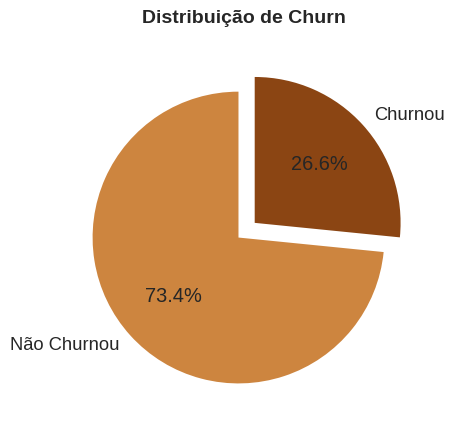

In [46]:
# gráfico de análise de % de churn total

# definindo paleta de cores

sns.set_palette("copper_r")  # Paleta marrom/cobre
cores_personalizadas = ['#8B4513', '#A0522D', '#CD853F', '#DEB887', '#F4A460']  # Tons de marrom
cores_churn = ['#8B4513', '#CD853F']  # Marrom escuro para churn, marrom claro para não-churn

# configuração geral do gráfico

plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.2)

# estatísticas do gráfico

total_clientes = len(df['churn'])
churn_count = df['churn'].sum()
no_churn_count = total_clientes - churn_count
churn_rate = (churn_count / total_clientes) * 100

# criando o gráfico

fig = plt.figure(figsize=(16, 12))

ax1 = plt.subplot(2, 3, 1)
labels = ['Não Churnou', 'Churnou']
sizes = [no_churn_count, churn_count]
colors = ['#CD853F', '#8B4513']

wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors,
                                      autopct='%1.1f%%', startangle=90,
                                      explode=(0.05, 0.1))

plt.title('Distribuição de Churn', fontsize=14, fontweight='bold', pad=20)

# plotando o gráfico

plt.show()


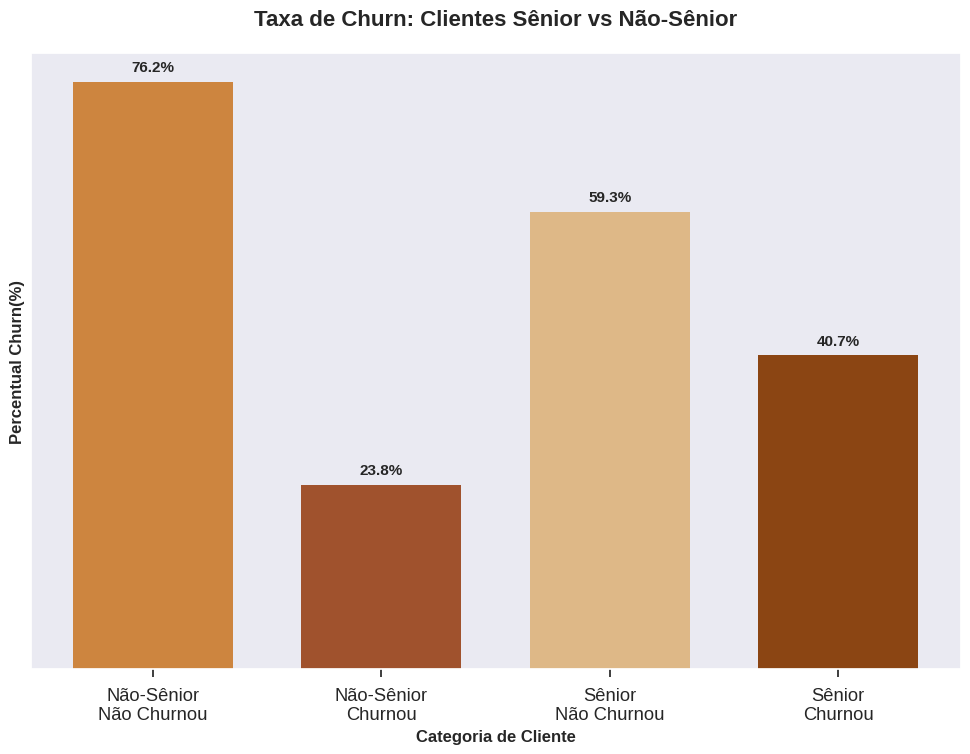

In [47]:
# gráfico de análise de churn por senioridade

# criando variável de churn x senioridade

churn_senior = df.groupby('customer_seniorcitizen')['churn'].value_counts(normalize=True).unstack()

# dados para o gráfico

categorias = ['Não-Sênior\nNão Churnou', 'Não-Sênior\nChurnou',
                  'Sênior\nNão Churnou', 'Sênior\nChurnou']

# valores para o gráfico

valores = [churn_senior.loc[0, False], churn_senior.loc[0, True],
           churn_senior.loc[1, False], churn_senior.loc[1, True]]

# convertendo em percentual

valores_percentuais = [valor * 100 for valor in valores]

# definindo cores

cores_senioridade = ['#CD853F', '#A0522D', '#DEB887', '#8B4513']

# criando o gráfico

plt.figure(figsize=(12, 8))
bars = plt.bar(categorias, valores_percentuais, color=cores_senioridade, width=0.7)

# criando rótulos e título

plt.title('Taxa de Churn: Clientes Sênior vs Não-Sênior',
              fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Percentual Churn(%)', fontsize=12, fontweight='bold')
plt.xlabel('Categoria de Cliente', fontsize=12, fontweight='bold')

# adicionando rótulos nas barras

for i, (bar, valor) in enumerate(zip(bars, valores_percentuais)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{valor:.1f}%', ha='center', va='bottom',
             fontweight='bold', fontsize=11)

# retirando as linhas de grade

plt.grid(False)

# retirando o eixo y

plt.yticks([])

# exibindo o gráfico

plt.show()

<ipython-input-48-3727321609>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_churn_quartil = df.groupby('quartil_tenure')['churn'].mean()
<ipython-input-48-3727321609>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_churn_quartil.index,


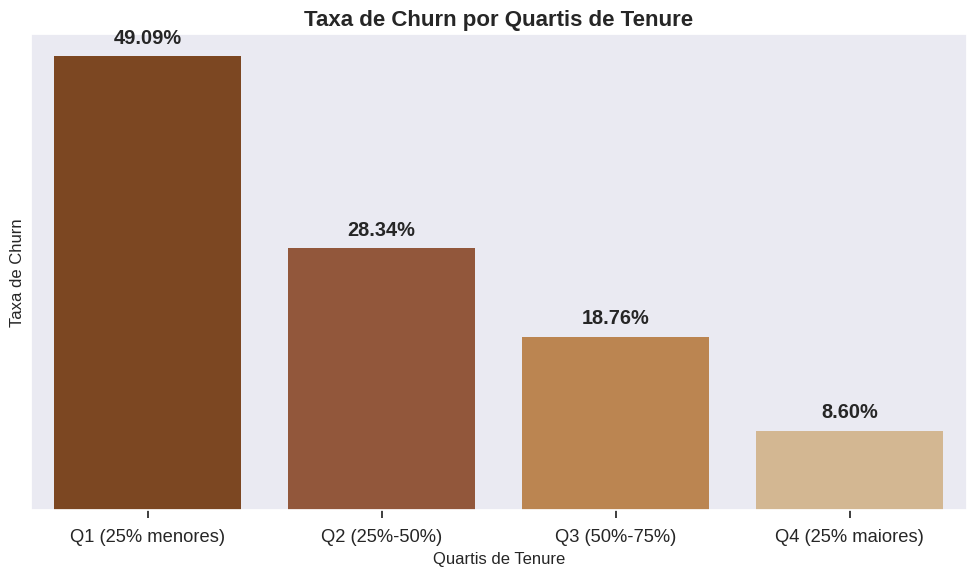

In [48]:
# gráfico de análise de tenure (em quartis) x churn

# definindo paleta de cores

cores_tenure = ['#8B4513', '#A0522D', '#CD853F', '#DEB887']

# definindo os quartis do tenure

df['quartil_tenure'] = pd.qcut(df['customer_tenure'], q=4, labels=['Q1 (25% menores)', 'Q2 (25%-50%)', 'Q3 (50%-75%)', 'Q4 (25% maiores)'])

# taxa de churn por quartil

taxa_churn_quartil = df.groupby('quartil_tenure')['churn'].mean()

# criando o gráfico

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=taxa_churn_quartil.index,
                 y=taxa_churn_quartil.values,
                 palette=cores_tenure)

# aplicando título e rótulos

plt.title('Taxa de Churn por Quartis de Tenure', fontsize=16, fontweight='bold')
plt.xlabel('Quartis de Tenure', fontsize=12)
plt.ylabel('Taxa de Churn', fontsize=12)

# adicionando rótulos de cada coluna

for i, v in enumerate(taxa_churn_quartil.values):
    ax.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontweight='bold')

# retirando rótulo do eixo y

plt.yticks([])

# exibindo o gráfico

plt.tight_layout()

plt.show()



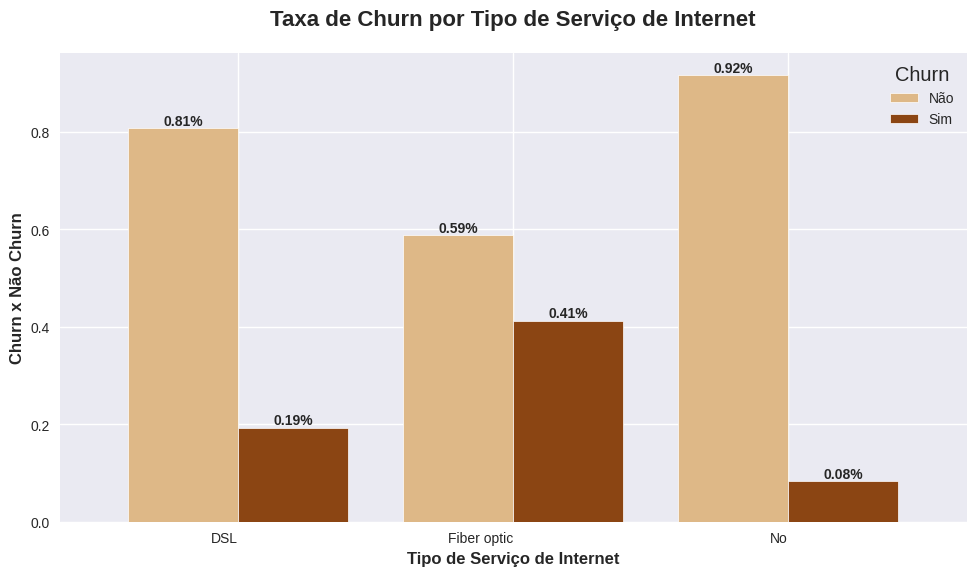

In [49]:
# gráfico de internet service x churn

# definindo cores padrão
plt.style.use('seaborn-v0_8')
sns.set_palette("dark")

# definindo proporção de internet service x churn
churn_proporçao = df.groupby('internet_internetservice')['churn'].value_counts(normalize=True).unstack()

# cores do gráfico
cores_internet = ['#DEB887','#8B4513']

# plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
churn_proporçao.plot(kind='bar',
                ax=ax,
                color=cores_internet,
                width=0.8,
                edgecolor='white',
                linewidth=0.5)


# ajustando gráfico
ax.set_title('Taxa de Churn por Tipo de Serviço de Internet',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Tipo de Serviço de Internet', fontsize=12, fontweight='bold')
ax.set_ylabel('Churn x Não Churn', fontsize=12, fontweight='bold')
ax.legend(title='Churn',
          labels=['Não', 'Sim'],
          loc='upper right')

# rotacionando eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# adicionando valores percentuais nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10, fontweight='bold')

# mostrar gráfico
plt.tight_layout()
plt.show()

<ipython-input-61-54300480>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_range_monthly = df.groupby('faixa_gasto_monthly').agg({
<ipython-input-61-54300480>:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_range_total = df.groupby('faixa_gasto_total').agg({


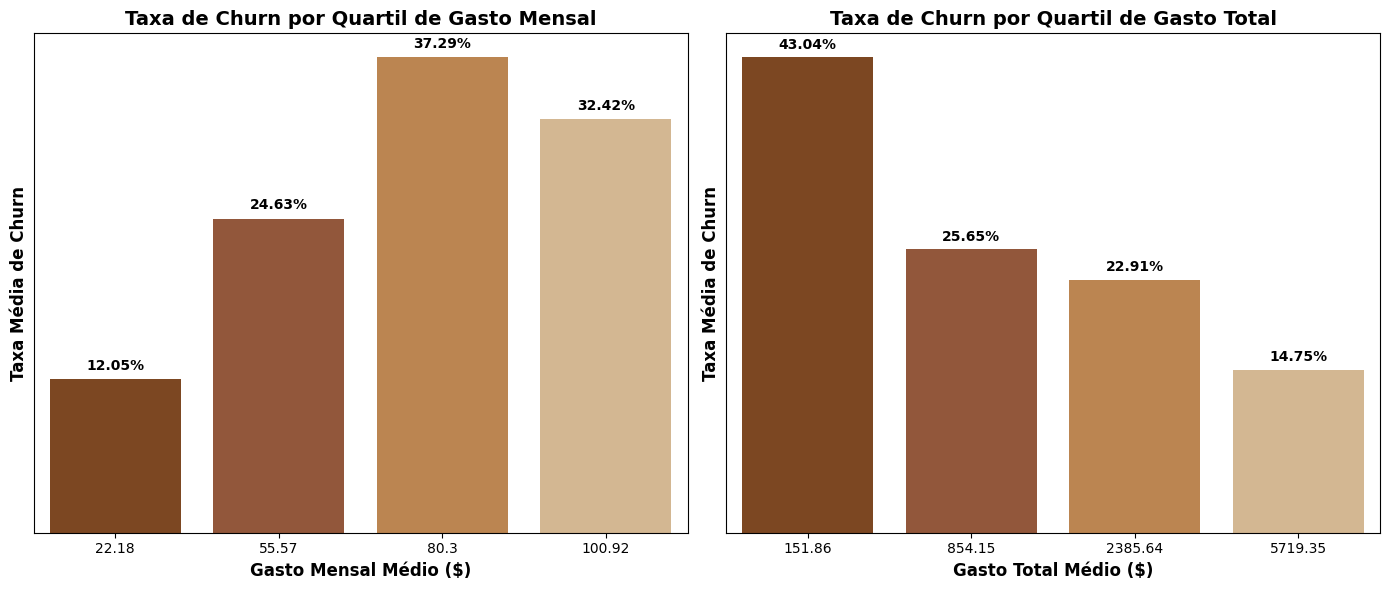

In [61]:
# gráfico de quartil charges monthly x churn & charges total x churn

# Configuração do estilo
plt.style.use('default')
sns.set_palette("YlOrBr")
cores_gasto = ['#8B4513', '#A0522D', '#CD853F', '#DEB887']

# Criando figura com subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#MONTHLY

# Calculando correlação
correlacao_churn_monthly = df['account_charges_monthly'].corr(df['churn'])

# Dividindo em quartis o charges monthly
df['faixa_gasto_monthly'] = pd.qcut(df['account_charges_monthly'], q=4, precision=0,
                                   labels=['Q1 (25% menores)', 'Q2 (25%-50%)', 'Q3 (50%-75%)', 'Q4 (25% maiores)'])

# Calculando o churn por quartil - monthly
churn_rate_by_range_monthly = df.groupby('faixa_gasto_monthly').agg({
    'churn': ['mean', 'count'],
    'account_charges_monthly': 'mean'
}).round(4)

# Renomeando colunas
churn_rate_by_range_monthly.columns = ['taxa_churn_media', 'quantidade_clientes', 'gasto_medio']
churn_rate_by_range_monthly = churn_rate_by_range_monthly.reset_index()

# Plotando primeiro gráfico
sns.barplot(x=round(churn_rate_by_range_monthly['gasto_medio'], 2),
            y=churn_rate_by_range_monthly['taxa_churn_media'],
            palette=cores_gasto,
            hue=churn_rate_by_range_monthly['gasto_medio'],
            legend=False,
            ax=ax1)

# Configurando primeiro subplot
ax1.set_xlabel('Gasto Mensal Médio ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Taxa Média de Churn', fontsize=12, fontweight='bold')
ax1.set_title('Taxa de Churn por Quartil de Gasto Mensal', fontsize=14, fontweight='bold')

# Adicionando rótulos no primeiro gráfico
for i, v in enumerate(churn_rate_by_range_monthly['taxa_churn_media']):
    ax1.text(i, v + 0.005, f'{v:.2%}', ha='center', va='bottom', fontweight='bold')

# Removendo yticks do primeiro gráfico
ax1.set_yticks([])

# TOTAL

# Calculando correlação para total
correlacao_churn_total = df['account_charges_total'].corr(df['churn'])

# Dividindo em quartis o charges total
df['faixa_gasto_total'] = pd.qcut(df['account_charges_total'], q=4, precision=0,
                                 labels=['Q1 (25% menores)', 'Q2 (25%-50%)', 'Q3 (50%-75%)', 'Q4 (25% maiores)'])

# Calculando o churn por quartil - total
churn_rate_by_range_total = df.groupby('faixa_gasto_total').agg({
    'churn': ['mean', 'count'],
    'account_charges_total': 'mean'
}).round(4)

# Renomeando colunas
churn_rate_by_range_total.columns = ['taxa_churn_media', 'quantidade_clientes', 'gasto_medio']
churn_rate_by_range_total = churn_rate_by_range_total.reset_index()

# Plotando segundo gráfico
sns.barplot(x=round(churn_rate_by_range_total['gasto_medio'], 2),
            y=churn_rate_by_range_total['taxa_churn_media'],
            palette=cores_gasto,
            hue=churn_rate_by_range_total['gasto_medio'],
            legend=False,
            ax=ax2)

# Configurando segundo subplot
ax2.set_xlabel('Gasto Total Médio ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Taxa Média de Churn', fontsize=12, fontweight='bold')
ax2.set_title('Taxa de Churn por Quartil de Gasto Total', fontsize=14, fontweight='bold')

# Adicionando rótulos no segundo gráfico
for i, v in enumerate(churn_rate_by_range_total['taxa_churn_media']):
    ax2.text(i, v + 0.005, f'{v:.2%}', ha='center', va='bottom', fontweight='bold')

# Removendo yticks do segundo gráfico
ax2.set_yticks([])

# Ajustando layout e mostrando
plt.tight_layout()
plt.show()


# Relatório Final

## Introdução

O objetivo da análise realizada foi identificar possíveis causas para o Churn da empresa TelecomX. Para isso, foi realizado o processo de ETL (Extração, Transformação e Carregamento) dos dados da empresa. A partir dessa análise inicial, a equipe de Data Science poderá avançar para modelos preditivos e estratégias para reduzir a evasão.  

## Limpeza e Tratamento de Dados

A primeira etapa do projeto foi a de limpeza e tratamento dos dados. Realizamos duas operações cruciais para a posterior utilização da base de dados.

* Substituir os 224 valores vazios ('') na coluna "Churn" encontrados;
* Substituir os 11 valores vazios (' ') na coluna "account_charges_total".

Para identificar quais eram os valores vazios, utilizamos inicialmente a função "isnull", porém náo foi encontrado nenhum valor nulo ou NaN. Depois, utilizamos a função "is in", da biblioteca Pandas e conseguimos identificar os valores vazios '' ou ' '.

## Análise Exploratória de Dados

Iniciamos a análise exploratória entendendo um pouco mais os dados, utilizando métodos como "describe" e "values.count". Depois, partimos para a análise da evasão a partir de segmentações como: Sexo, Senioridade, Adoção do Serviço de Telefonia, entre outros, utilizando a função "sort by".

Identificamos os fatores que mais impactavam no churn do cliente, sendo eles:
* Senioridade (clientes sênior possuem taxa de churn superior à média)
* Tenure (clientes com menor tenure possuem maior propensão à evasão)
* Internet Service (clientes que adotam o serviço de Fibra Ótica possuem taxa de churn superior à média)
* Tipo de Contrato (clientes com contratos mensais - mês a mês - possuem maior evasão do que a média)
* Método de Pagamento (Cobrança eletrônica poussi taxa de churn superior à média)
* Gasto Mensal (clientes com gasto mensal mais alto possuem taxa de churn maior)
* Gasto Anual (clientes com gasto anual mais alto possuem taxa de churn menor)

### Gráficos utilizados na análise

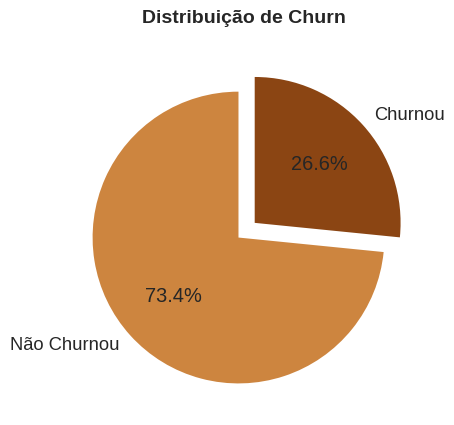

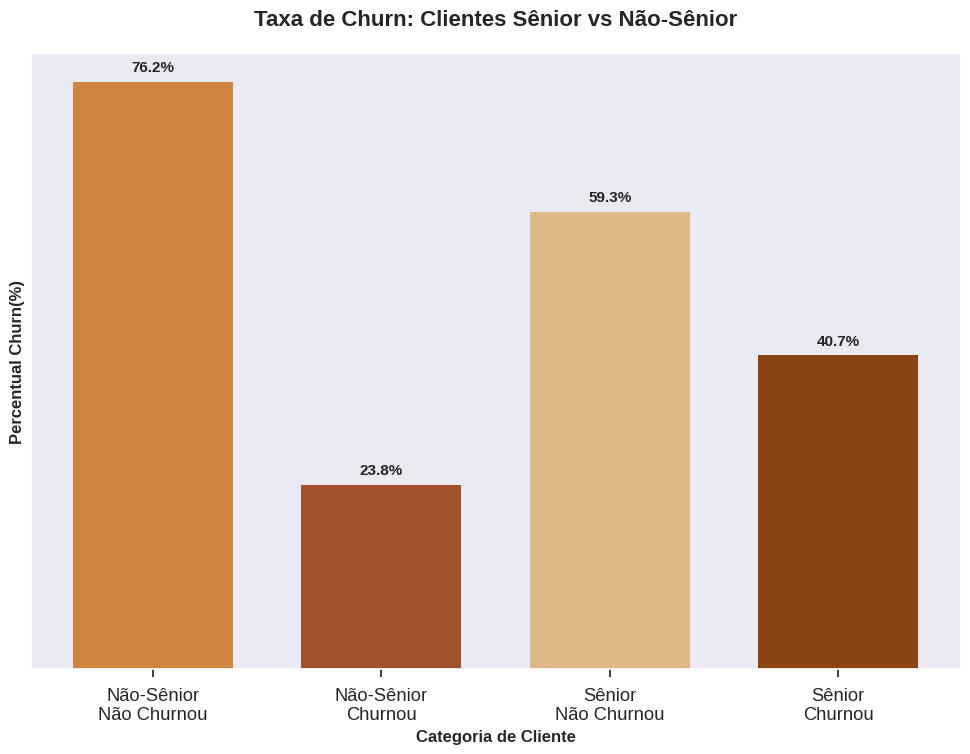

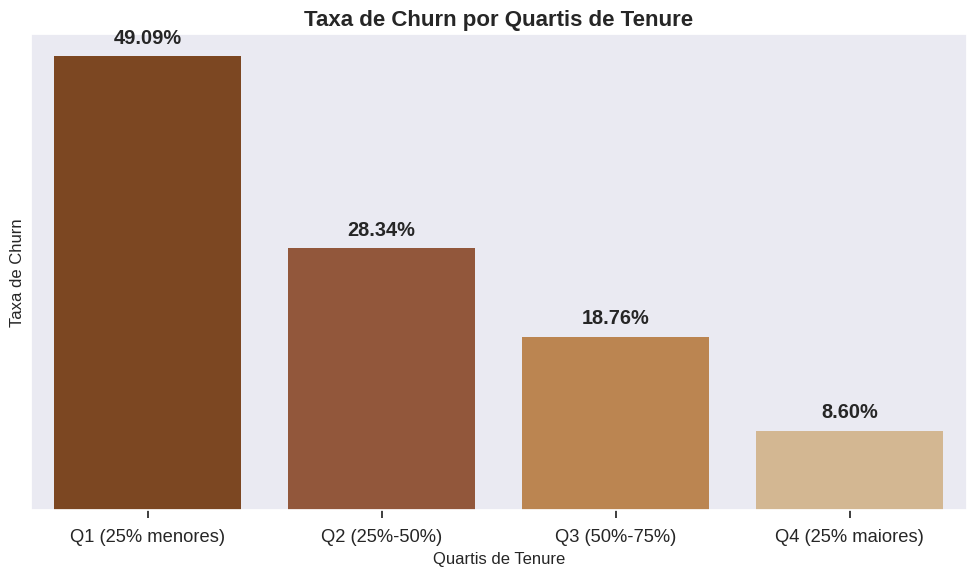

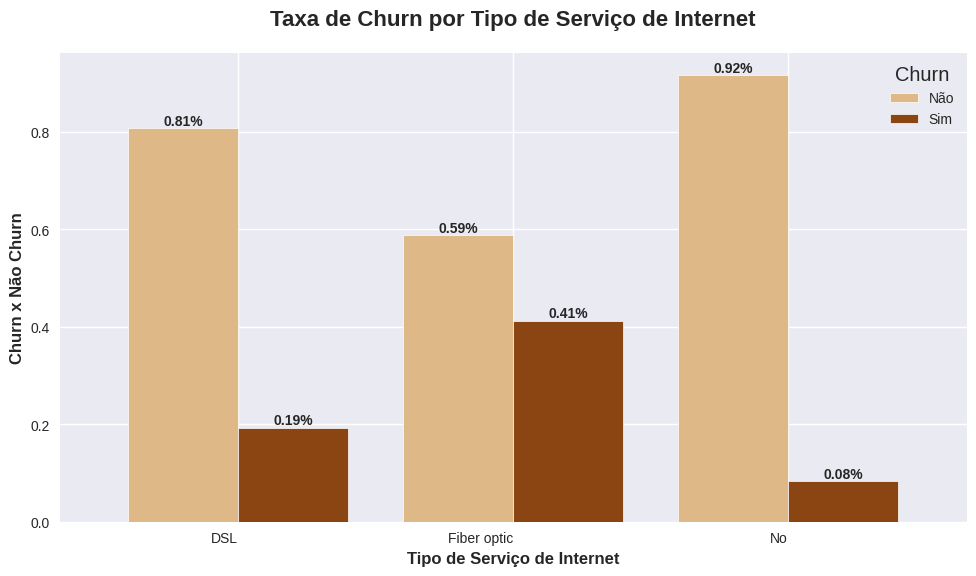

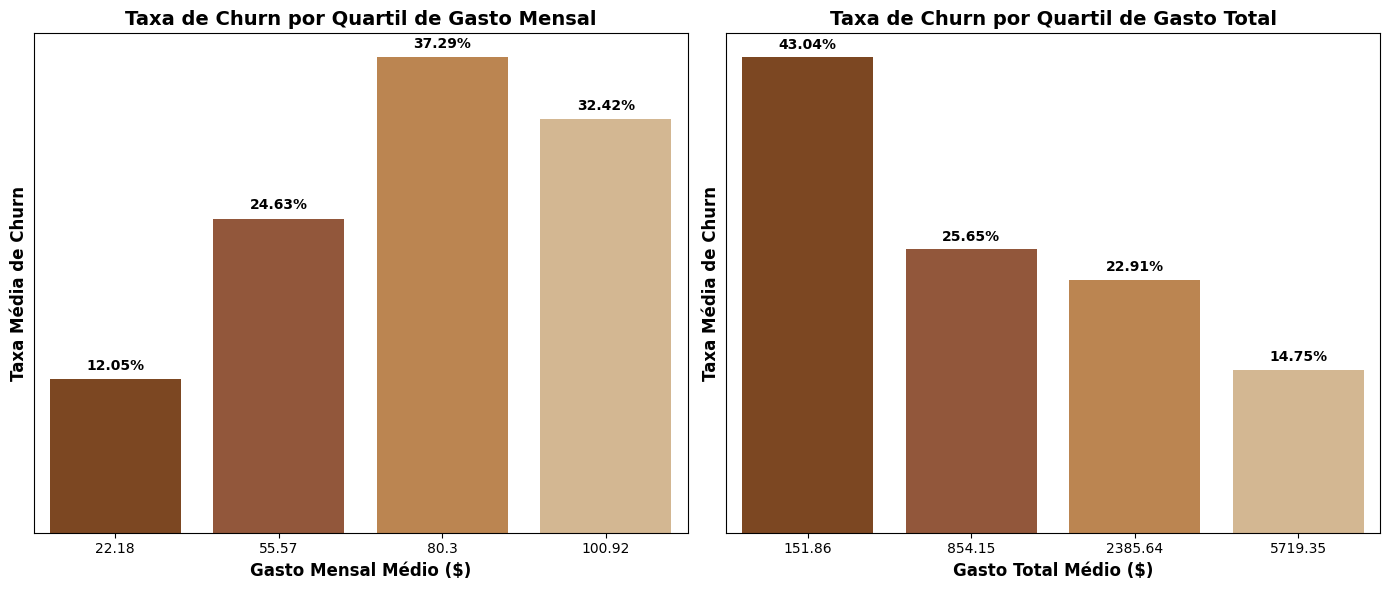

## Conclusão e Hipóteses

# Conclusão da Análise Exploratória de Churn

## Insights Principais

A análise exploratória revelou **sete fatores críticos** que influenciam significativamente o comportamento de churn dos clientes, fornecendo uma base sólida para estratégias de retenção direcionadas.

## Perfil de Risco Demográfico

**Insight:** Clientes sênior apresentam maior propensão ao churn, contrariando a expectativa comum de que clientes mais velhos sejam mais fiéis.

**Hipótese:** Este comportamento pode estar relacionado a dificuldades de adaptação tecnológica, menor tolerância a problemas de serviço, ou necessidades específicas não atendidas adequadamente pela empresa.

## Relacionamento e Fidelização

**Insight:** Existe uma correlação inversa entre tempo de relacionamento (tenure) e churn - clientes novos são mais vulneráveis à evasão.

**Hipótese:** O período inicial é crítico para a experiência do cliente. Problemas na onboarding, expectativas não atendidas ou falta de engajamento nos primeiros meses podem determinar a permanência do cliente.

## Paradoxo Tecnológico

**Insight:** Clientes de Fibra Ótica, apesar de terem acesso ao serviço tecnologicamente superior, apresentam maior taxa de churn.

**Hipótese:** Este paradoxo pode indicar que clientes de fibra ótica têm expectativas mais elevadas de performance e qualidade, tornando-se menos tolerantes a falhas. Alternativamente, podem ter maior poder aquisitivo e facilidade para migrar para concorrentes.

## Flexibilidade vs. Compromisso

**Insight:** Contratos mensais estão fortemente associados ao churn, enquanto contratos anuais demonstram maior retenção através do gasto anual elevado.

**Hipótese:** A flexibilidade contratual, embora atrativa inicialmente, reduz a barreira de saída. Clientes com maior compromisso financeiro anual demonstram maior satisfação ou percepção de valor, resultando em menor churn.

## Gestão de Pagamentos

**Insight:** Cobrança eletrônica apresenta taxa de churn superior à média, contrariando a conveniência esperada deste método.

**Hipótese:** Pode haver problemas técnicos recorrentes, falhas na comunicação sobre cobranças, ou o método pode estar associado a um perfil de cliente específico com características comportamentais distintas.

## Paradoxo do Valor Percebido

**Insight:** Observamos uma relação contraditória onde gastos mensais altos correlacionam com maior churn, enquanto gastos anuais altos indicam menor churn.

**Hipótese:** Clientes com gastos mensais elevados podem estar insatisfeitos com a relação custo-benefício no curto prazo, enquanto aqueles com investimento anual alto demonstram maior comprometimento e possivelmente melhor percepção de valor agregado.

## Recomendações

Para e empresa TelecomX

1. **Programa de atenção especial** para clientes sênior e novos (primeiros 6 meses)
2. **Revisão da experiência** de clientes Fibra Ótica para alinhar expectativas
3. **Incentivos para migração** de contratos mensais para anuais
4. **Otimização do processo** de cobrança eletrônica
5. **Estratégia de retenção diferenciada** baseada no perfil de gasto do cliente

Para o time de Data Science
* 1. Engenharia de Features: Criar variáveis combinadas (ex: tenure × tipo_contrato, gasto_mensal/gasto_anual) e features temporais para capturar padrões sazonais de churn nos primeiros meses de relacionamento.
* 2. Segmentação Preditiva: Desenvolver modelos específicos por segmento (sênior vs. não-sênior, fibra vs. outros serviços) dado que os fatores de churn apresentam comportamentos distintos entre grupos.
* 3. Análise de Sobrevivência: Implementar modelos de Cox ou Kaplan-Meier para estimar o tempo até o churn, especialmente focando na janela crítica dos primeiros 6 meses de tenure.
* 4. Investigação de Interações: Explorar interações entre método de pagamento e outros fatores, particularmente o paradoxo da cobrança eletrônica e sua relação com perfil demográfico e tipo de serviço.
* 5. Validação Temporal: Usar validação cruzada temporal e testar a estabilidade dos modelos ao longo do tempo, considerando que fatores como tecnologia (fibra ótica) podem ter impactos evolutivos no comportamento de churn.

# Atividade Extra

In [63]:
# correlação entre account_charges_daily e churn

correlacao_churn_daily = df['account_charges_daily'].corr(df['churn'])
print(f"Correlação entre Churn e Charges Daily: {correlacao_churn_monthly}")

Correlação entre Churn e Charges Daily: 0.18253057586463525


In [71]:
# gráfico da correlação

from scipy import stats

<ipython-input-73-931338976>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(box_data, labels=['Não Churn', 'Churn'], patch_artist=True)


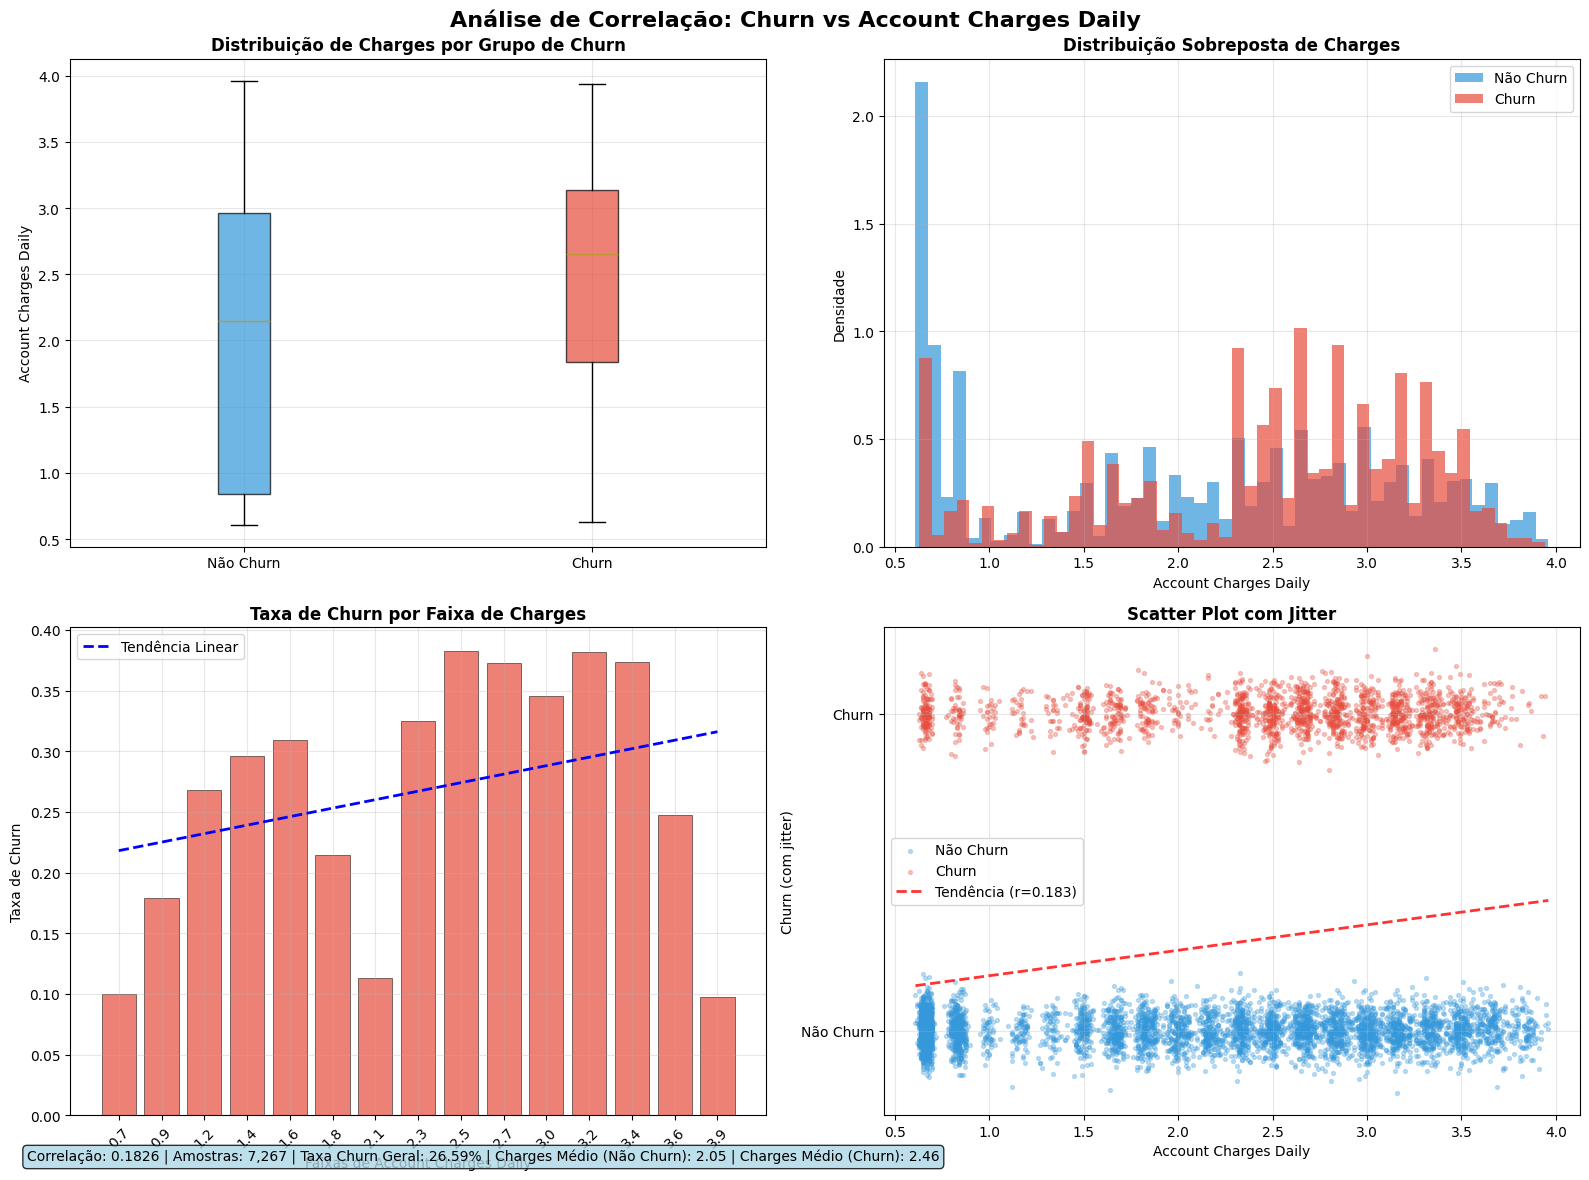

In [73]:
# Criar figura com múltiplas visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise de Correlação: Churn vs Account Charges Daily',
             fontsize=16, fontweight='bold')

# 1. BOXPLOT COMPARATIVO (mais claro para mostrar a diferença)
ax1 = axes[0, 0]
box_data = [df[df['churn'] == False]['account_charges_daily'],
            df[df['churn'] == True]['account_charges_daily']]
bp = ax1.boxplot(box_data, labels=['Não Churn', 'Churn'], patch_artist=True)
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Distribuição de Charges por Grupo de Churn', fontweight='bold')
ax1.set_ylabel('Account Charges Daily')
ax1.grid(True, alpha=0.3)

# 2. HISTOGRAMA SOBREPOSTO
ax2 = axes[0, 1]
ax2.hist(df[df['churn'] == False]['account_charges_daily'],
         bins=50, alpha=0.7, color='#3498db', label='Não Churn', density=True)
ax2.hist(df[df['churn'] == True]['account_charges_daily'],
         bins=50, alpha=0.7, color='#e74c3c', label='Churn', density=True)
ax2.set_title('Distribuição Sobreposta de Charges', fontweight='bold')
ax2.set_xlabel('Account Charges Daily')
ax2.set_ylabel('Densidade')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. TAXA DE CHURN POR FAIXA (mais informativo!)
ax3 = axes[1, 0]
# Criar faixas de charges
df['charges_faixa'] = pd.cut(df['account_charges_daily'],
                                   bins=15, precision=2)
churn_por_faixa = df.groupby('charges_faixa', observed=True).agg({
    'churn': ['mean', 'count']
}).reset_index()

# Simplificar nomes das colunas
churn_por_faixa.columns = ['faixa', 'taxa_churn', 'count']
# Filtrar faixas com pelo menos 30 observações
churn_por_faixa = churn_por_faixa[churn_por_faixa['count'] >= 30]

# Criar pontos médios das faixas para o eixo x
faixa_midpoints = [interval.mid for interval in churn_por_faixa['faixa']]

# Gráfico de barras
bars = ax3.bar(range(len(faixa_midpoints)), churn_por_faixa['taxa_churn'],
               color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=0.5)

# Adicionar linha de tendência
z = np.polyfit(range(len(faixa_midpoints)), churn_por_faixa['taxa_churn'], 1)
p = np.poly1d(z)
ax3.plot(range(len(faixa_midpoints)), p(range(len(faixa_midpoints))),
         'b--', linewidth=2, label='Tendência Linear')

ax3.set_title('Taxa de Churn por Faixa de Charges',
              fontweight='bold')
ax3.set_xlabel('Faixas de Account Charges Daily')
ax3.set_ylabel('Taxa de Churn')
ax3.set_xticks(range(len(faixa_midpoints)))
ax3.set_xticklabels([f'{x:.1f}' for x in faixa_midpoints], rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. SCATTER COM JITTER (melhor visualização)
ax4 = axes[1, 1]
# Adicionar jitter (ruído) no eixo Y para espalhar os pontos
jitter_strength = 0.05
y_jittered_false = np.random.normal(0, jitter_strength,
                                   sum(df['churn'] == False))
y_jittered_true = np.random.normal(1, jitter_strength,
                                  sum(df['churn'] == True))

# Scatter com jitter
ax4.scatter(df[df['churn'] == False]['account_charges_daily'],
           y_jittered_false, alpha=0.3, s=8, c='#3498db', label='Não Churn')
ax4.scatter(df[df['churn'] == True]['account_charges_daily'],
           y_jittered_true, alpha=0.3, s=8, c='#e74c3c', label='Churn')

# Linha de tendência
z = np.polyfit(df['account_charges_daily'], df['churn'].astype(int), 1)
p = np.poly1d(z)
x_trend = np.linspace(df['account_charges_daily'].min(),
                     df['account_charges_daily'].max(), 100)
ax4.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2,
         label=f'Tendência (r={correlacao_churn_daily:.3f})')

ax4.set_title('Scatter Plot com Jitter',
              fontweight='bold')
ax4.set_xlabel('Account Charges Daily')
ax4.set_ylabel('Churn (com jitter)')
ax4.set_yticks([0, 1])
ax4.set_yticklabels(['Não Churn', 'Churn'])
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()

# Adicionar texto com estatísticas
fig.text(0.02, 0.02,
         f'Correlação: {correlacao_churn_daily:.4f} | '
         f'Amostras: {len(df):,} | '
         f'Taxa Churn Geral: {df["churn"].mean():.2%} | '
         f'Charges Médio (Não Churn): {df[~df["churn"]]["account_charges_daily"].mean():.2f} | '
         f'Charges Médio (Churn): {df[df["churn"]]["account_charges_daily"].mean():.2f}',
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.show()